In [1]:
import pandas as pd
import numpy as np
import re
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import model_selection, naive_bayes, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from google.colab import drive

In [2]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/NLP Project/Dataset/train.csv')
df_dev = pd.read_csv('/content/gdrive/MyDrive/NLP Project/Dataset/dev.csv')
df_test = pd.read_csv('/content/gdrive/MyDrive/NLP Project/Dataset/test.csv')

In [4]:
x = df.text
y = df.is_humor

dev_X = df_dev.text
dev_Y = df_dev.is_humor

gold_test_X = df_test.text
gold_test_Y = df_test.is_humor


In [5]:
def train(model, vectorizer):
  skf = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

  if vectorizer == "TFIDF":
    vect = TfidfVectorizer(max_features=5000) 
  else :
    vect = CountVectorizer()
    
  vect.fit(df.text)
  
  x = vect.transform(df.text)
  dev_X = vect.transform(df_dev.text)
  gold_test_X = vect.transform(df_test.text)

  kFoldVal = [{'f1':[]}, {'acc':[]}]
  devData = [{'f1':[]}, {'acc':[]}]
  goldTest = [{'f1':[]}, {'acc':[]}, {'precision':[]}, {'recall':[]}]
  
  for train_index, test_index in skf.split(x, y):
    train_X, test_X = x[train_index], x[test_index]
    train_Y, test_Y = y[train_index], y[test_index]
    model.fit(train_X, train_Y)

    kFoldVal[0]['f1'].append(f1_score(test_Y, model.predict(test_X)))
    devData[0]['f1'].append(f1_score(dev_Y, model.predict(dev_X)))
    goldTest[0]['f1'].append(f1_score(gold_test_Y, model.predict(gold_test_X)))

    kFoldVal[1]['acc'].append(accuracy_score(test_Y, model.predict(test_X)))
    devData[1]['acc'].append(accuracy_score(dev_Y, model.predict(dev_X)))
    goldTest[1]['acc'].append(accuracy_score(gold_test_Y, model.predict(gold_test_X)))

    goldTest[2]['precision'].append(precision_score(gold_test_Y, model.predict(gold_test_X)))
    goldTest[3]['recall'].append(recall_score(gold_test_Y, model.predict(gold_test_X)))


  def plot():
    # F1 score
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.plot(kFoldVal[0]['f1'], "--o")
    plt.plot(devData[0]['f1'], "--o")
    plt.plot(goldTest[0]['f1'], "--o")
    plt.title("F1 score plot")
    plt.ylabel("F1 Score")
    plt.xlabel("Number of Splits")
    plt.legend(['K Fold Validation', 'Dev data', 'Gold Test data'], loc='best')
    plt.show()
    print("K Fold Validation F1 Score mean value : ", np.mean(kFoldVal[0]['f1']), "\n")
    print("Dev Data F1 Score mean value : ",np.mean(devData[0]['f1']), "\n")
    print("Gold Test Data F1 Score mean value : ",np.mean(goldTest[0]['f1']), "\n")

    # Accuracy
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.plot(kFoldVal[1]['acc'], "--o")
    plt.plot(devData[1]['acc'], "--o")
    plt.plot(goldTest[1]['acc'], "--o")
    plt.title("Accuracy plot")
    plt.ylabel("Accuarcy")
    plt.xlabel("Number of Splits")
    plt.legend(['K Fold Validation', 'Dev data', 'Gold Test data'], loc='best')
    plt.show()
    print("K Fold Validation Accuracy mean value : ", np.mean(kFoldVal[1]['acc']), "\n")
    print("Dev Data Accuracy mean value : ",np.mean(devData[1]['acc']), "\n")
    print("Gold Test Data Accuracy mean value : ",np.mean(goldTest[1]['acc']), "\n")

    # Precision and Recall
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.plot(goldTest[2]['precision'], "--o")
    plt.plot(goldTest[3]['recall'], "--o")
    plt.title("Gold Test Precision and recall plot")
    plt.xlabel("Number of Splits")
    plt.legend(['Precision', 'Recall'], loc='best')
    plt.show()
    print("Gold Test Data Precision Score mean value : ",np.mean(goldTest[2]['precision']), "\n")
    print("Gold Test Data Recall Score mean value : ",np.mean(goldTest[3]['recall']), "\n")

  plot()

# WITH TFIDF

========SVM============


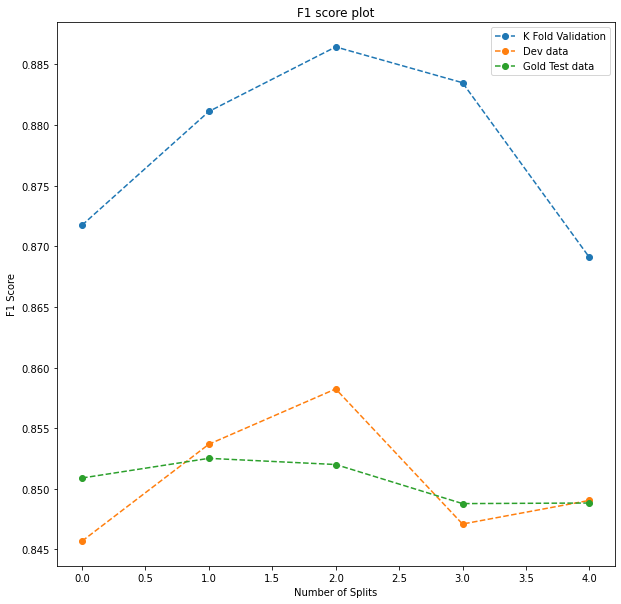

K Fold Validation F1 Score mean value :  0.8783770041868781 

Dev Data F1 Score mean value :  0.8507479747489487 

Gold Test Data F1 Score mean value :  0.850603026661374 



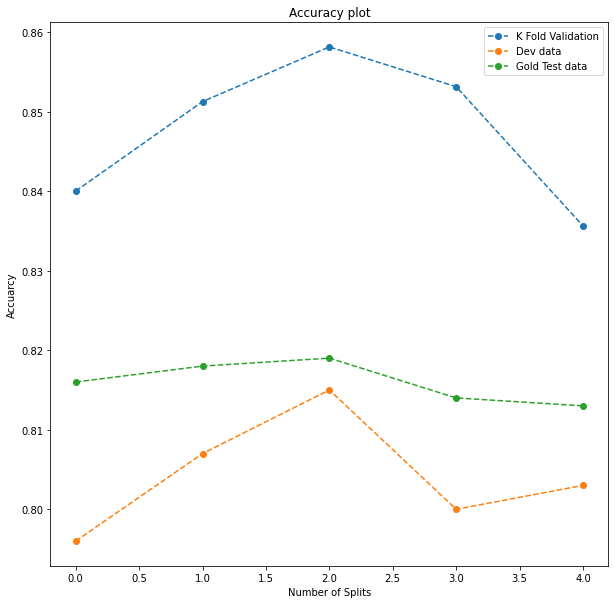

K Fold Validation Accuracy mean value :  0.8476250000000001 

Dev Data Accuracy mean value :  0.8042 

Gold Test Data Accuracy mean value :  0.8160000000000001 



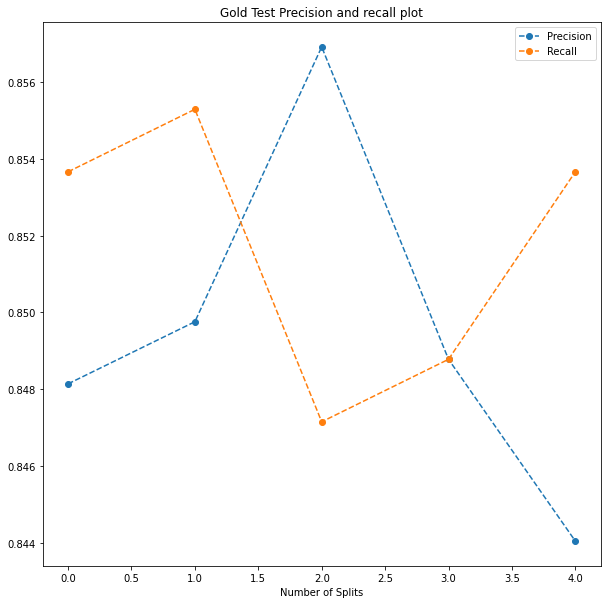

Gold Test Data Precision Score mean value :  0.8495279335872338 

Gold Test Data Recall Score mean value :  0.8517073170731708 



In [6]:
print("========SVM============")
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
train(SVM, "TFIDF")

========Naive Bayes==========


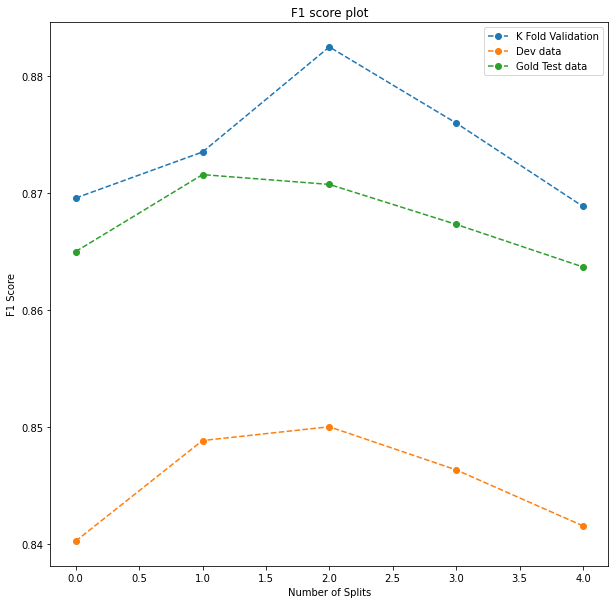

K Fold Validation F1 Score mean value :  0.8740757868389759 

Dev Data F1 Score mean value :  0.8453753693037764 

Gold Test Data F1 Score mean value :  0.8676517336428242 



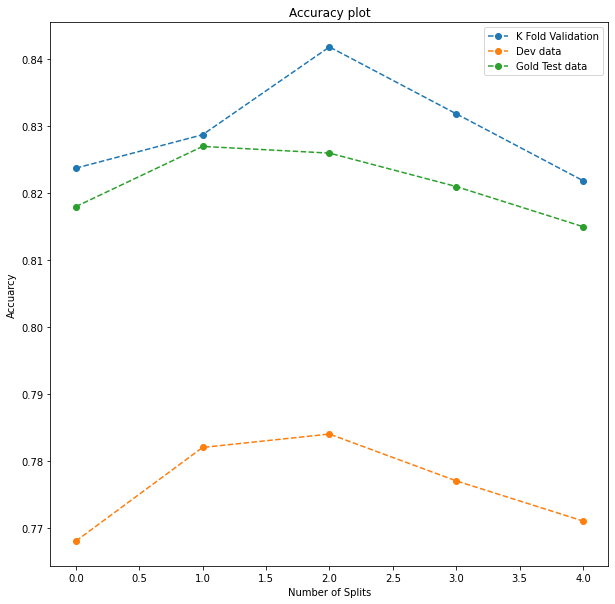

K Fold Validation Accuracy mean value :  0.8296250000000001 

Dev Data Accuracy mean value :  0.7764 

Gold Test Data Accuracy mean value :  0.8213999999999999 



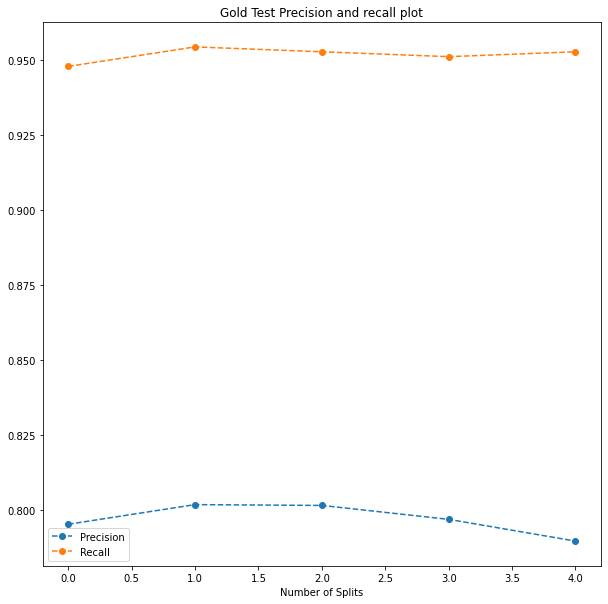

Gold Test Data Precision Score mean value :  0.7971351640670272 

Gold Test Data Recall Score mean value :  0.951869918699187 



In [7]:
print("========Naive Bayes==========")
Naive = naive_bayes.MultinomialNB()
train(Naive, "TFIDF")

# WITH COUNT VECTORIZER

========SVM============


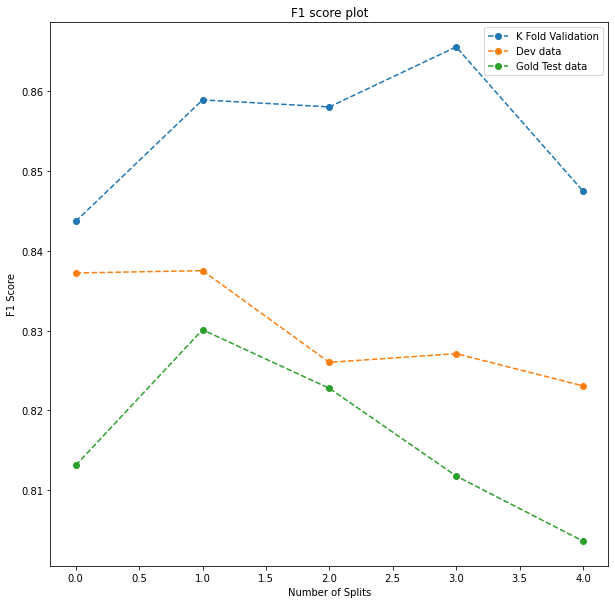

K Fold Validation F1 Score mean value :  0.8547115465163555 

Dev Data F1 Score mean value :  0.8301803684709936 

Gold Test Data F1 Score mean value :  0.8162780785751425 



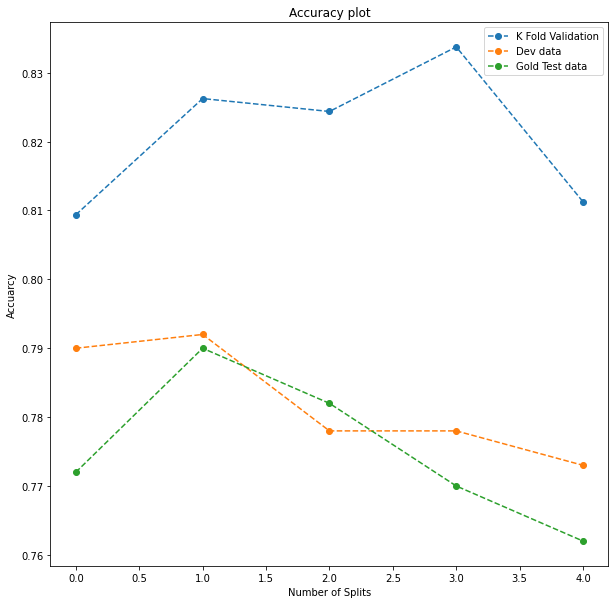

K Fold Validation Accuracy mean value :  0.8210000000000001 

Dev Data Accuracy mean value :  0.7822000000000001 

Gold Test Data Accuracy mean value :  0.7752000000000001 



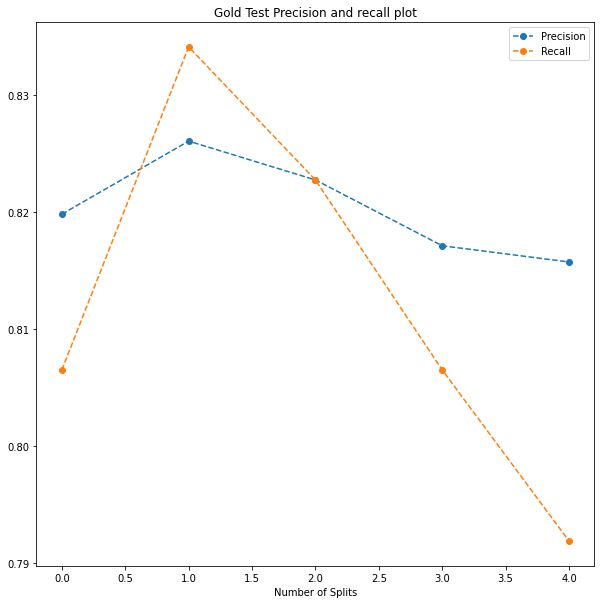

Gold Test Data Precision Score mean value :  0.820312946341151 

Gold Test Data Recall Score mean value :  0.8123577235772357 



In [8]:
print("========SVM============")
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
train(SVM, "COUNT")

========Naive Bayes==========


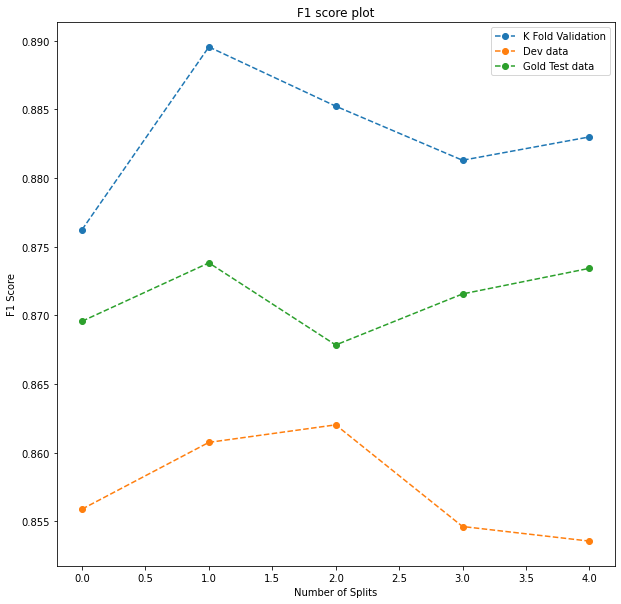

K Fold Validation F1 Score mean value :  0.8830584783744054 

Dev Data F1 Score mean value :  0.8573607479639339 

Gold Test Data F1 Score mean value :  0.8712373543964725 



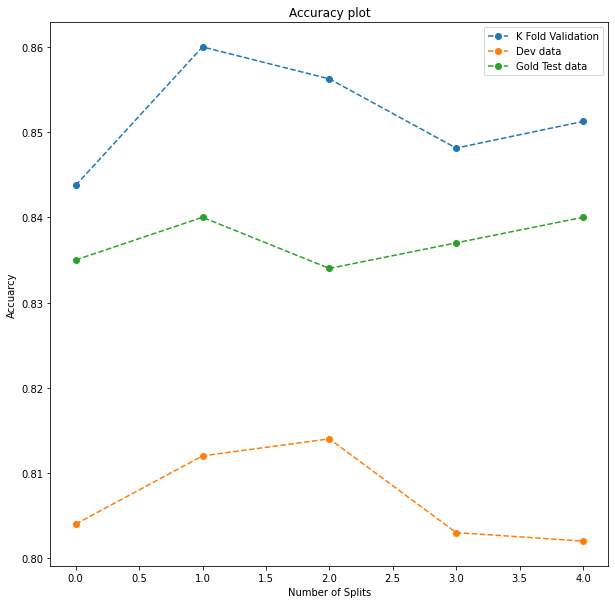

K Fold Validation Accuracy mean value :  0.8518749999999999 

Dev Data Accuracy mean value :  0.807 

Gold Test Data Accuracy mean value :  0.8371999999999999 



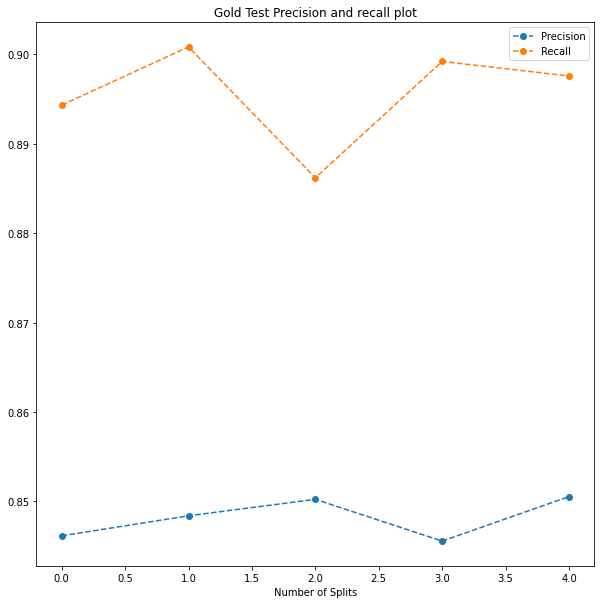

Gold Test Data Precision Score mean value :  0.8481769865440796 

Gold Test Data Recall Score mean value :  0.8956097560975609 



In [9]:
print("========Naive Bayes==========")
Naive = naive_bayes.MultinomialNB()
train(Naive, "COUNT")